# User input imputation

In [ ]:
import pickle

# Import python packages
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.impute import KNNImputer

import functions.plots as plotting



## 1. Generate data with NaN

In [2]:
df_exe = pd.read_csv('../data/raw/exercise.csv')
df_cal = pd.read_csv('../data/raw/calories.csv') 

In [3]:
df = pd.merge(df_exe, df_cal, on='User_ID', how='left')

In [4]:
df_bio = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]

In [5]:
print(df_bio.head())
print(df_bio.shape)

   Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   68   190.0    94.0      29.0       105.0       40.8     231.0
1   20   166.0    60.0      14.0        94.0       40.3      66.0
2   69   179.0    79.0       5.0        88.0       38.7      26.0
3   34   179.0    71.0      13.0       100.0       40.5      71.0
4   27   154.0    58.0      10.0        81.0       39.8      35.0
(15000, 7)


In [6]:
df_bio 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,78,193.0,97.0,2.0,84.0,38.3,11.0


In [7]:
df_bio_nan = df_bio.copy()
# Randomly select 25% of the data to be NaN

# Total number of elements (cells)
total_cells = df_bio_nan.shape[0] * df_bio_nan.shape[1]
num_nan = int(total_cells * 0.25)

# Generate random (row, col) positions
row_indices = np.random.randint(0, df_bio_nan.shape[0], num_nan)
col_indices = np.random.randint(0, df_bio_nan.shape[1], num_nan)
# Use zip to iterate over pairs and set NaNs` is iterating over pairs of row and column indices generated randomly earlier, and setting the corresponding elements in the DataFrame `df_bio_nan` to be NaN.

# Use zip to iterate over pairs and set NaNs
for row, col in zip(row_indices, col_indices):
    df_bio_nan.iat[row, col] = np.nan


print(f"Total NaNs inserted: {df_bio_nan.isna().sum().sum()} / {total_cells}")
print(df_bio_nan.isna().sum())

Total NaNs inserted: 23250 / 105000
Age           3365
Height        3351
Weight        3221
Duration      3346
Heart_Rate    3303
Body_Temp     3359
Calories      3305
dtype: int64


In [8]:
df_bio_nan 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68.0,190.0,94.0,29.0,105.0,40.8,231.0
1,20.0,NaN,60.0,14.0,94.0,40.3,66.0
2,69.0,179.0,79.0,5.0,88.0,38.7,NaN
3,34.0,179.0,71.0,13.0,100.0,40.5,71.0
4,27.0,154.0,58.0,NaN,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,20.0,193.0,NaN,NaN,92.0,NaN,45.0
14996,27.0,165.0,65.0,NaN,85.0,39.2,NaN
14997,43.0,159.0,58.0,16.0,90.0,40.1,75.0
14998,78.0,193.0,97.0,2.0,84.0,38.3,NaN


## 2. Train imputer

In [ ]:
# 1. Create the KNN imputer
imputer = KNNImputer(n_neighbors=3, weights='distance')  # or 'distance'

# 2. Fit and transform the NaN-filled DataFrame
df_bio_imputed = pd.DataFrame(
    imputer.fit_transform(df_bio_nan),
    columns=df_bio_nan.columns
)

# 4. Check
print("✅ Imputation complete. NaNs remaining:", df_bio_imputed.isna().sum().sum())

✅ Imputation complete. NaNs remaining: 0


## 3. Evaluate

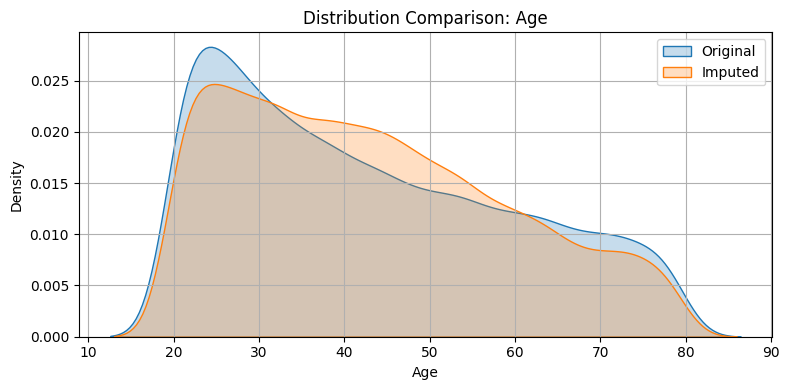

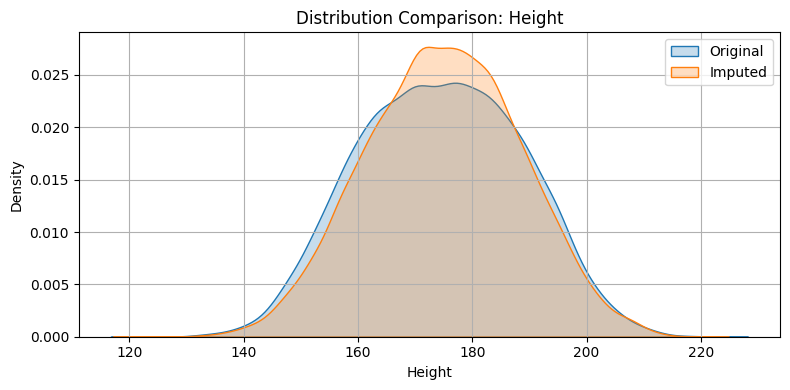

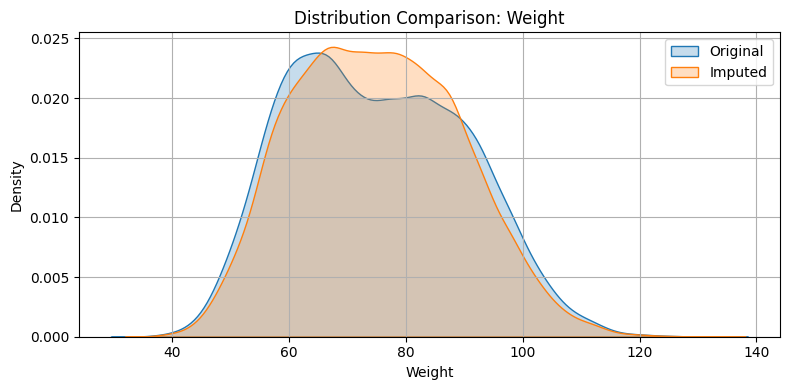

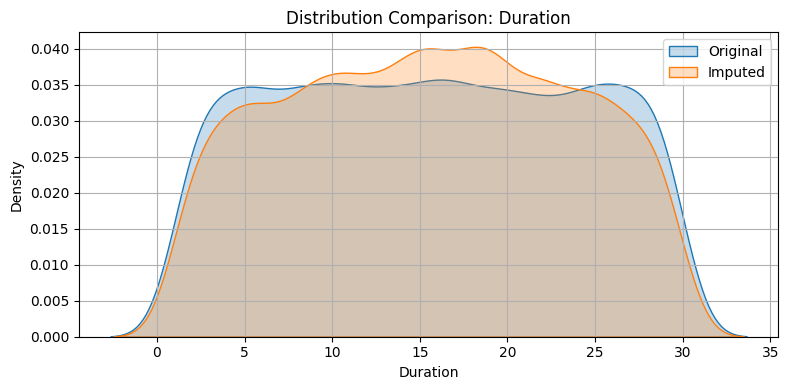

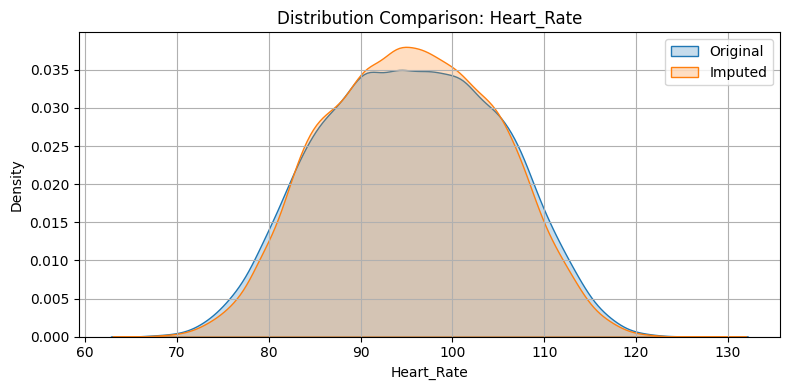

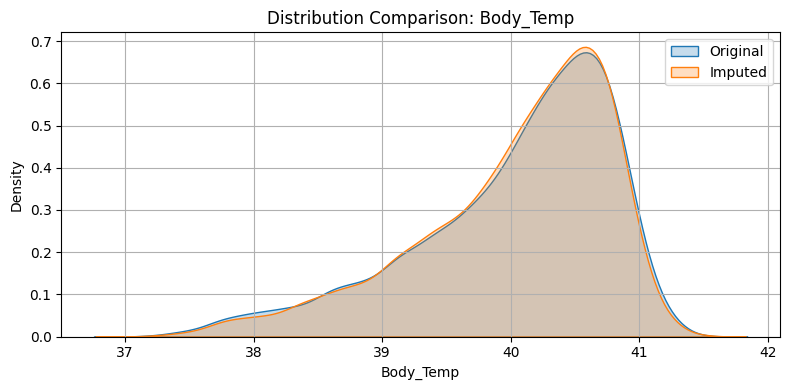

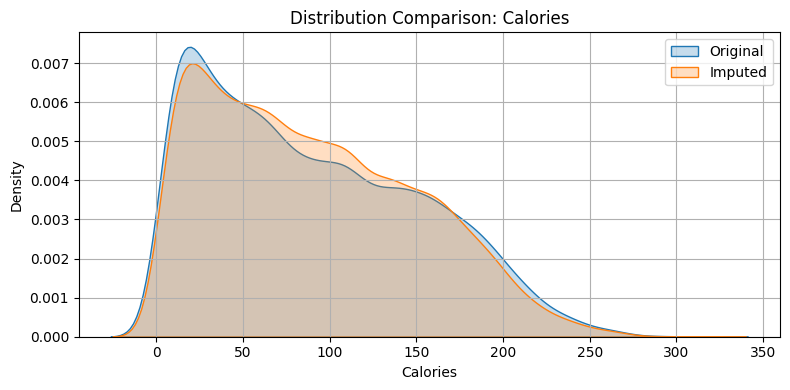

In [10]:
# Run it
plotting.compare_all_distributions(df_bio, df_bio_imputed)

## 4. Save

In [11]:
Path('../models').mkdir(exist_ok=True)

with open('../models/imputer.pkl', 'wb') as output_file:
    pickle.dump(imputer, output_file)